In [5]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree



# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import os 
import sys


sys.path.append(os.path.abspath("../../src"))   
import soporte_regresion as f
pd.options.display.float_format = "{:,.2f}".format 
pd.set_option("display.max_columns", None)

In [6]:
df_encoded=pd.read_csv("../../datos/datos1/datos_nulos_minmax_encoded.csv", index_col=0).reset_index(drop=True)

In [7]:
df_encoded.head()

,price,bathrooms,province,municipality,district,size_MinMax,distance_MinMax,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,status_desconocido,status_good,status_newdevelopment,status_renew,newDevelopment_False,newDevelopment_True,newDevelopment_desconocido,floor_1,floor_14,floor_2,floor_3,floor_4,floor_5,floor_6,floor_7,floor_8,floor_bj,floor_desconocido,floor_en,floor_ss,floor_st,hasLift_False,hasLift_True,hasLift_desconocido,parkingSpace_False,parkingSpace_True,parkingSpace_desconocido
0,750.00,680.23,693.41,705.59,687.21,0.31,0.11,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
1,750.00,680.23,693.41,687.37,685.64,0.39,0.27,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
2,400.00,650.45,693.41,639.59,601.63,0.36,0.92,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
3,450.00,680.23,593.40,646.09,601.63,0.53,0.79,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
4,450.00,680.23,593.40,650.54,601.63,0.31,0.64,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00


Separamos en x e y

In [8]:
x= df_encoded.drop(columns="price")
y= df_encoded[["price"]]

Separamos en train y test y le hacemos aprender

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7, random_state=42)
modelo_lineal= LinearRegression()
modelo_lineal.fit(x_train, y_train) 

LinearRegression()

Ahora hacemos la predicción

In [10]:
y_test_pred=modelo_lineal.predict(x_test)         #con esto predice un precio
y_train_pred= modelo_lineal.predict(x_train)

***K-Fold***

In [11]:
f.metricas(y_train, y_train_pred, y_test, y_test_pred)

,train,test
r2_score,0.63,0.62
MAE,37.18,37.99
MSE,"2,356.99","2,371.96"
RMSE,48.55,48.70


In [12]:
kf= KFold(n_splits=5,
          shuffle=True,
          random_state=42)

score_r2= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "r2")
np.mean(score_r2)

0.5633701911382245

In [13]:
score_mae= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_mean_absolute_error")
abs(np.mean(score_mae))

40.26370559845241

In [14]:
score_mse= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_mean_squared_error")
abs(np.mean(score_mse))

2724.436652973925

In [15]:
score_rmse= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_root_mean_squared_error")
abs(np.mean(score_rmse))

52.00817728278607

In [16]:
kf= KFold(n_splits=200,
          shuffle=True,
          random_state=42)

score_r2= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "r2")
np.mean(score_r2)

-21.249360724069206

In [17]:
score_rmse= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_root_mean_squared_error")
abs(np.mean(score_rmse))

46.39889319413814

**Como seleccionar que variables independientes eliminar si sucede over fitting**

In [18]:

df_coefs=pd.DataFrame(modelo_lineal.coef_, columns= x.columns).T
df_coefs.sort_values(by=0, key= abs, ascending=False)    #para que ordene según la importancia

,0
size_MinMax,81.63
floor_st,63.91
propertyType_studio,-54.52
rooms_1,-44.63
distance_MinMax,34.95
rooms_0,34.50
rooms_4,30.62
propertyType_duplex,28.24
floor_14,25.74
hasLift_desconocido,25.66


### Como ya me di cuenta de que no parece ser una relación lineal paso a decision tree

**DECISION TREE**  
Separa los datos en nodos y luego hace la media en el nodo final de la variable dependiente para los datos que se encuentran en ese nodo y cuando tenga que predecir, si el dato acaba en ese nodo, se le aplicará esa media como valor de su variable dependiente.  
   
***Para elegir el mejor árbol de decisión (conformado de unas variables independientes concretas)***   
Calcula la suma de los errores al cuadrado dividido entre n del nodo final de cada arbol y compara ese error y se queda con el que tenga el error mínimo
  
- Si hay mucha profundidad, los nodos finales van a ser tan específicos que se va a dar over fitting
  
***Como decirle que pare de dividir para evitar el Over Fitting***  
- max_depth (profundida máxima del árbol)
- min_sample_split (numero de datos minimo en el nodo (madre) para que se pueda dividir)  
- min_sample_leaf (numero de datos minimo que tienen que tener los nodos(hijos) en los que me divido) 
- max_leaf_nodes (numero maximo de nodos que quiero que tenga mi arbol)  
- max_features (numero máximo de variables independientes que queremos)

Pruebo primero a ver cómo me lo hace 

In [19]:
modelo_arbol_vacio= DecisionTreeRegressor()         
modelo_arbol_vacio.fit(x_train, y_train)
y_pred_test_arb_vacio= modelo_arbol_vacio.predict(x_test)
y_pred_train_arb_vacio= modelo_arbol_vacio.predict(x_train)
df_metricas_arbol_vacio= f.metricas(y_train, y_pred_train_arb_vacio, y_test, y_pred_test_arb_vacio)
df_metricas_arbol_vacio

,train,test
r2_score,1.00,0.33
MAE,0.03,48.80
MSE,0.14,"4,178.72"
RMSE,0.37,64.64


Dejándole a él sólo me da que se produce overfitting

In [20]:
# Parámetros a evaluar
params_arbol = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

grid_search_arbol=GridSearchCV(DecisionTreeRegressor(), param_grid=params_arbol, cv=5, scoring= "neg_mean_squared_error", n_jobs=-1)

grid_search_arbol.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_leaf_nodes': [4, 6, 8, 10, 20, 30],
                         'min_samples_leaf': [10, 50, 100, 200],
                         'min_samples_split': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [21]:
modelo_final_arbol=grid_search_arbol.best_estimator_  #para ver el mejor arbol que me ha elegido
modelo_final_arbol

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=6, min_samples_leaf=10,
                      min_samples_split=10)

In [22]:
y_pred_test_arb= modelo_final_arbol.predict(x_test)
y_pred_train_arb= modelo_final_arbol.predict(x_train)
df_metricas_arbol= f.metricas(y_train, y_pred_train_arb, y_test, y_pred_test_arb)
df_metricas_arbol=df_metricas_arbol.T
df_metricas_arbol.reset_index(inplace=True)
df_metricas_arbol



,index,r2_score,MAE,MSE,RMSE
0,train,0.70,32.46,"1,884.16",43.41
1,test,0.63,35.05,"2,315.25",48.12


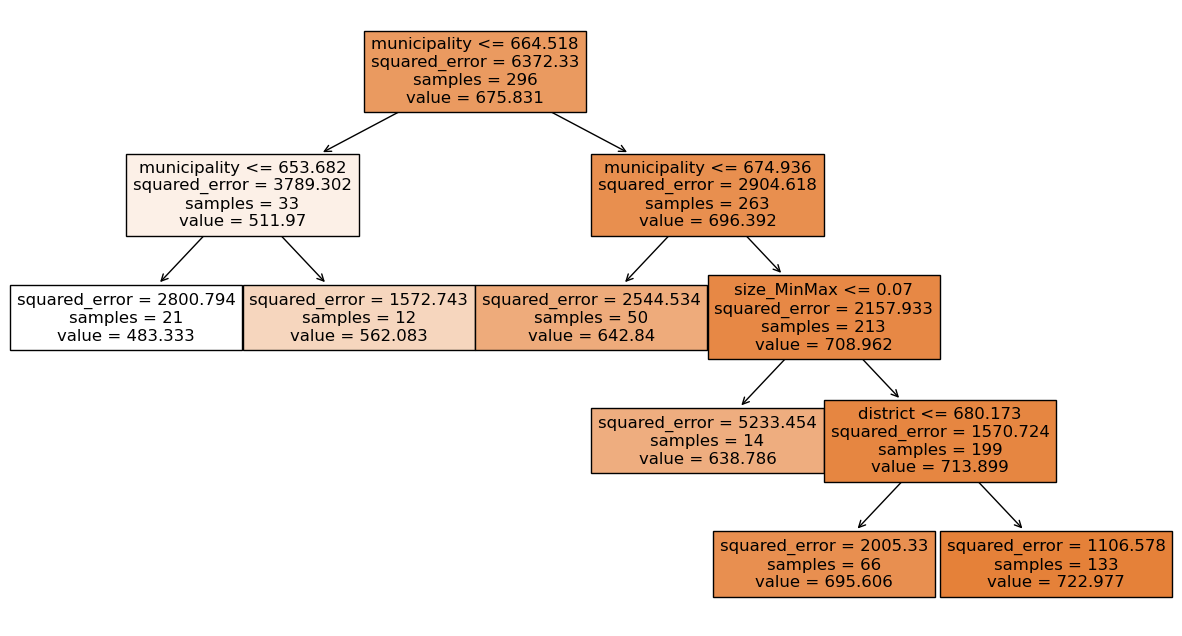

In [23]:
plt.figure(figsize=(15,8))
plot_tree(decision_tree=modelo_final_arbol, feature_names=x.columns, filled=True);

### **Este es el modelo inicial sobre el que cambiar los parametros para mejorar las métricas y por ende el modelo**

### Vamos a graficarlo porque así se entienden mejor

In [24]:
df_resultados_arbol=pd.DataFrame(grid_search_arbol.cv_results_)

In [25]:
df_resultados_arbol.sort_values(by= "rank_test_score", ascending=True).head(2)    #aquí podemos ver cual nos ha dado como mejor modelo (el 1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
208,0.01,0.00,0.01,0.00,7,6,10,10,"{'max_depth': 7, 'max_leaf_nodes': 6, 'min_sam...","-2,326.32","-1,909.43","-1,969.06","-2,298.29","-3,235.31","-2,347.68",474.60,1
112,0.02,0.00,0.02,0.00,5,6,10,10,"{'max_depth': 5, 'max_leaf_nodes': 6, 'min_sam...","-2,326.32","-1,909.43","-1,986.71","-2,298.29","-3,235.31","-2,351.21",471.82,2


In [26]:
df_resultados_arbol.shape   #no da el número de modelos que ha generado el árbol 

(384, 17)

In [27]:
df_resultados_arbol_filtrado=df_resultados_arbol.filter(like= "param").drop(columns= "params")
df_resultados_arbol_filtrado["MSE"]= df_resultados_arbol["mean_test_score"]
df_resultados_arbol_filtrado.head()


,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
0,3,4,10,10,"-2,690.74"
1,3,4,10,50,"-2,534.39"
2,3,4,10,100,"-2,534.39"
3,3,4,10,200,"-2,600.93"
4,3,4,50,10,"-3,707.69"


In [28]:
df_rmse_profun= np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs()).reset_index()
df_rmse_profun.head()

,param_max_depth,MSE
0,3,66.42
1,5,66.37
2,7,66.39
3,10,66.39


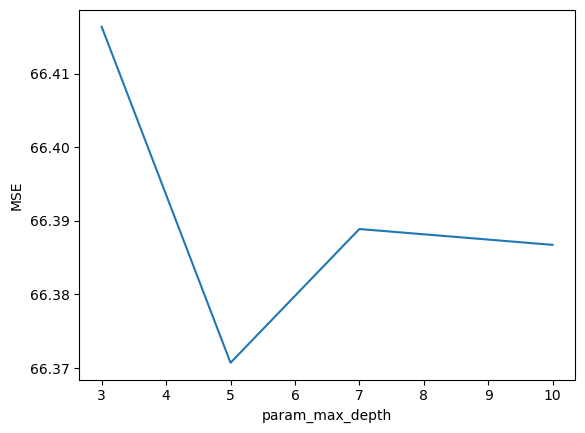

In [29]:
sns.lineplot(x= "param_max_depth", y = "MSE", data= df_rmse_profun);

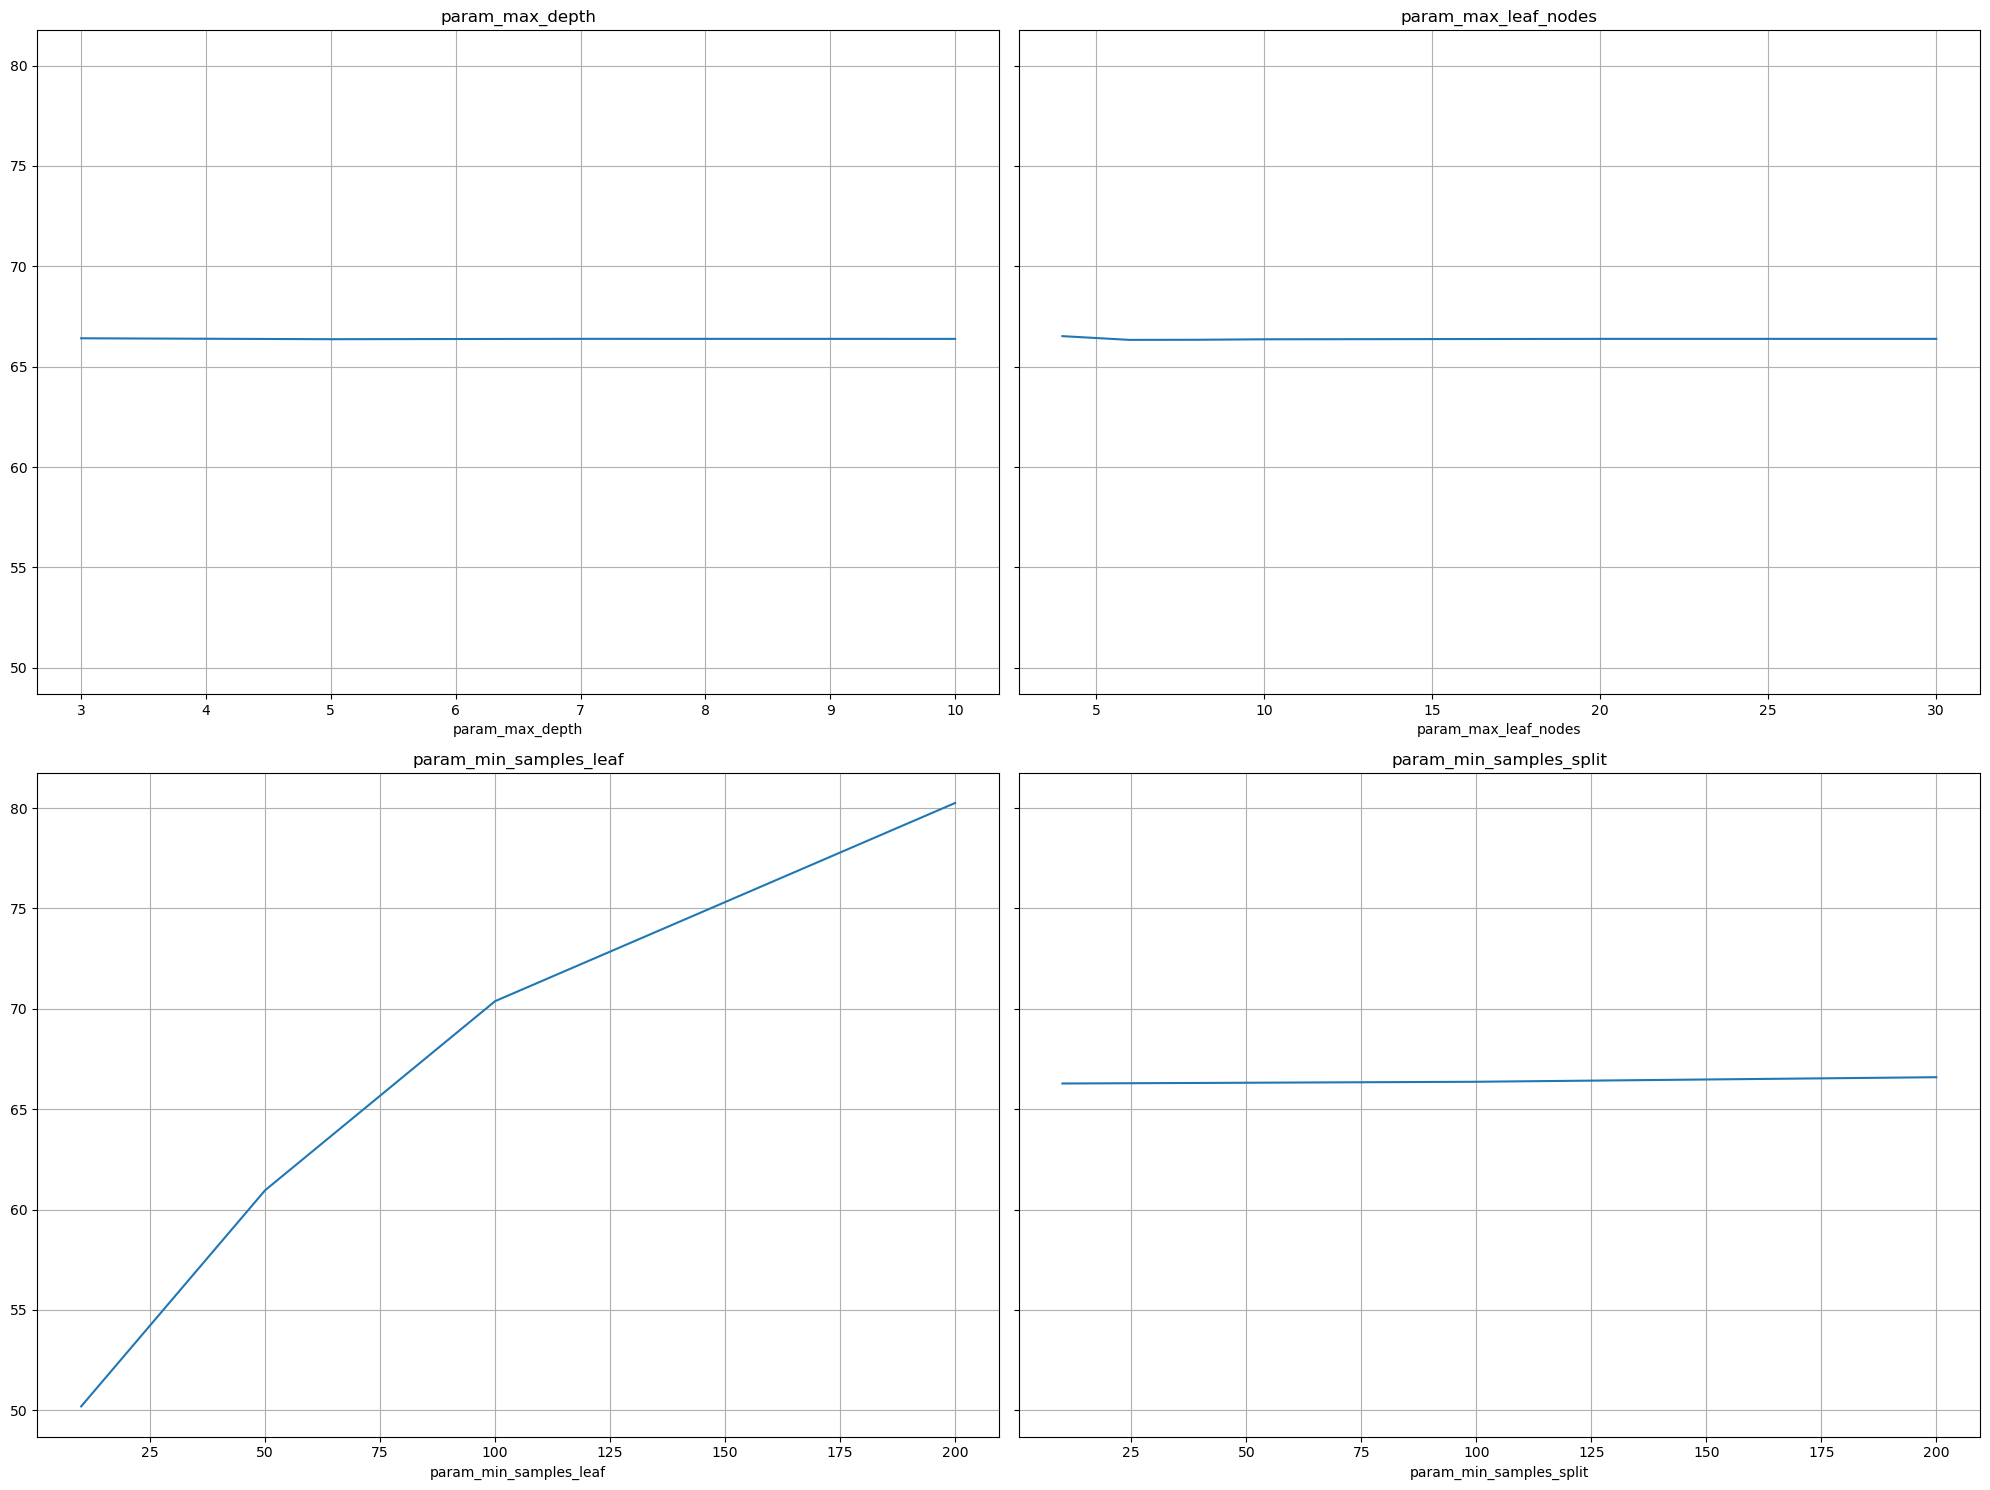

In [30]:

df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 15), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())
    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)
plt.tight_layout()
plt.show() 

In [31]:
pd.DataFrame(modelo_final_arbol.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by = "Importancia", ascending=False)

,Importancia
municipality,0.92
size_MinMax,0.06
district,0.02
bathrooms,0.00
floor_bj,0.00
floor_14,0.00
floor_2,0.00
floor_3,0.00
floor_4,0.00
floor_5,0.00


## Lo pruebo cambiando parametros

In [ ]:
# Parámetros a evaluar
params_arbol_prueba = {
    'max_depth': [3,4,5,6,7,8],
    'min_samples_split': [7,8,9,10,15,25,35],
    'min_samples_leaf': [7,8,9,10,15,25,35],
    'max_leaf_nodes': [1,2,3,4,5,6,7,8,9]
}

grid_search_arbol_prueba=GridSearchCV(DecisionTreeRegressor(), param_grid=params_arbol_prueba , cv=5, scoring= "neg_mean_squared_error", n_jobs=-1)

grid_search_arbol_prueba.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [7, 8, 9, 10, 15, 25, 35],
                         'min_samples_split': [7, 8, 9, 10, 15, 25, 35]},
             scoring='neg_mean_squared_error')

In [33]:
modelo_final_arbol_prueba=grid_search_arbol_prueba.best_estimator_  #para ver el mejor arbol que me ha elegido
modelo_final_arbol_prueba

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=7, min_samples_leaf=10,
                      min_samples_split=10)

In [34]:
y_pred_test_arb_prueba= modelo_final_arbol_prueba.predict(x_test)
y_pred_train_arb_prueba= modelo_final_arbol_prueba.predict(x_train)
df_metricas_arbol_prueba= f.metricas(y_train, y_pred_train_arb_prueba, y_test, y_pred_test_arb_prueba)

df_metricas_arbol_prueba=df_metricas_arbol_prueba.T
df_metricas_arbol_prueba.reset_index(inplace=True)
df_metricas_arbol_prueba

,index,r2_score,MAE,MSE,RMSE
0,train,0.72,31.25,"1,782.81",42.22
1,test,0.62,35.81,"2,331.72",48.29


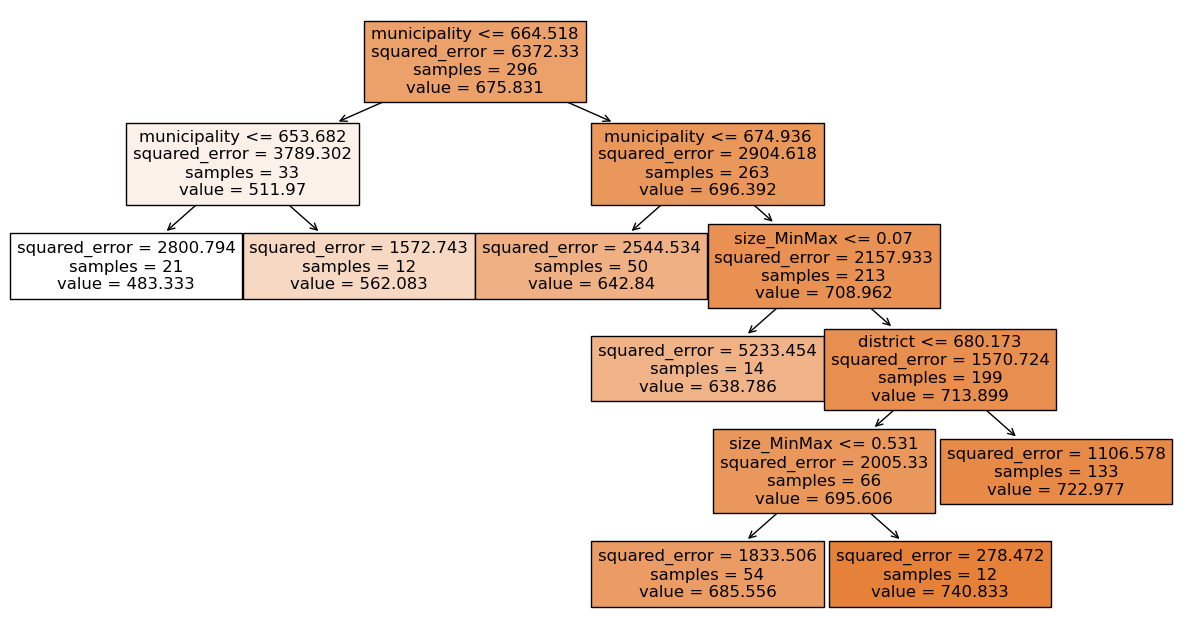

In [35]:
plt.figure(figsize=(15,8))
plot_tree(decision_tree=modelo_final_arbol_prueba, feature_names=x.columns, filled=True);

AHORA QUE SABEMOS QUE LA MEJOR DEPTH ES 60 ESTARÍA BIEN COMPARAR LA 10,11 Y 12 PARA VER SI SIGUE SIENDO LA MEJOR EL 10

### Vamos a graficarlo porque así se entienden mejor

In [36]:
df_resultados_arbol_prueba=pd.DataFrame(grid_search_arbol_prueba.cv_results_)

In [37]:
df_resultados_arbol_prueba.sort_values(by= "rank_test_score", ascending=True).head(2)    #aquí podemos ver cual nos ha dado como mejor modelo (el 1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2080,0.01,0.00,0.01,0.00,7,7,10,8,"{'max_depth': 7, 'max_leaf_nodes': 7, 'min_sam...","-2,240.85","-1,859.95","-1,911.97","-2,272.02","-3,299.66","-2,316.89",518.92,1
1641,0.01,0.00,0.01,0.00,6,7,10,10,"{'max_depth': 6, 'max_leaf_nodes': 7, 'min_sam...","-2,240.85","-1,859.95","-1,911.97","-2,272.02","-3,299.66","-2,316.89",518.92,1


In [38]:
df_resultados_arbol_prueba.shape   #no da el número de modelos que ha generado el árbol 

(2646, 17)

In [39]:
df_resultados_arbol_filtrado_prueba=df_resultados_arbol_prueba.filter(like= "param").drop(columns= "params")
df_resultados_arbol_filtrado_prueba["MSE"]= df_resultados_arbol_prueba["mean_test_score"]
df_resultados_arbol_filtrado_prueba.head()


,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
0,3,1,7,7,NaN
1,3,1,7,8,NaN
2,3,1,7,9,NaN
3,3,1,7,10,NaN
4,3,1,7,15,NaN


In [40]:
df_rmse_profun_prueba= np.sqrt(df_resultados_arbol_filtrado_prueba.groupby("param_max_depth")["MSE"].mean().abs()).reset_index()
df_rmse_profun_prueba.head()

,param_max_depth,MSE
0,3,52.06
1,4,52.12
2,5,52.00
3,6,52.00
4,7,52.00


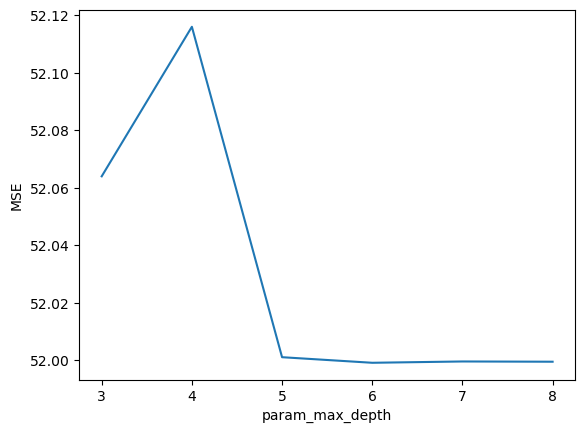

In [41]:
sns.lineplot(x= "param_max_depth", y = "MSE", data= df_rmse_profun_prueba);

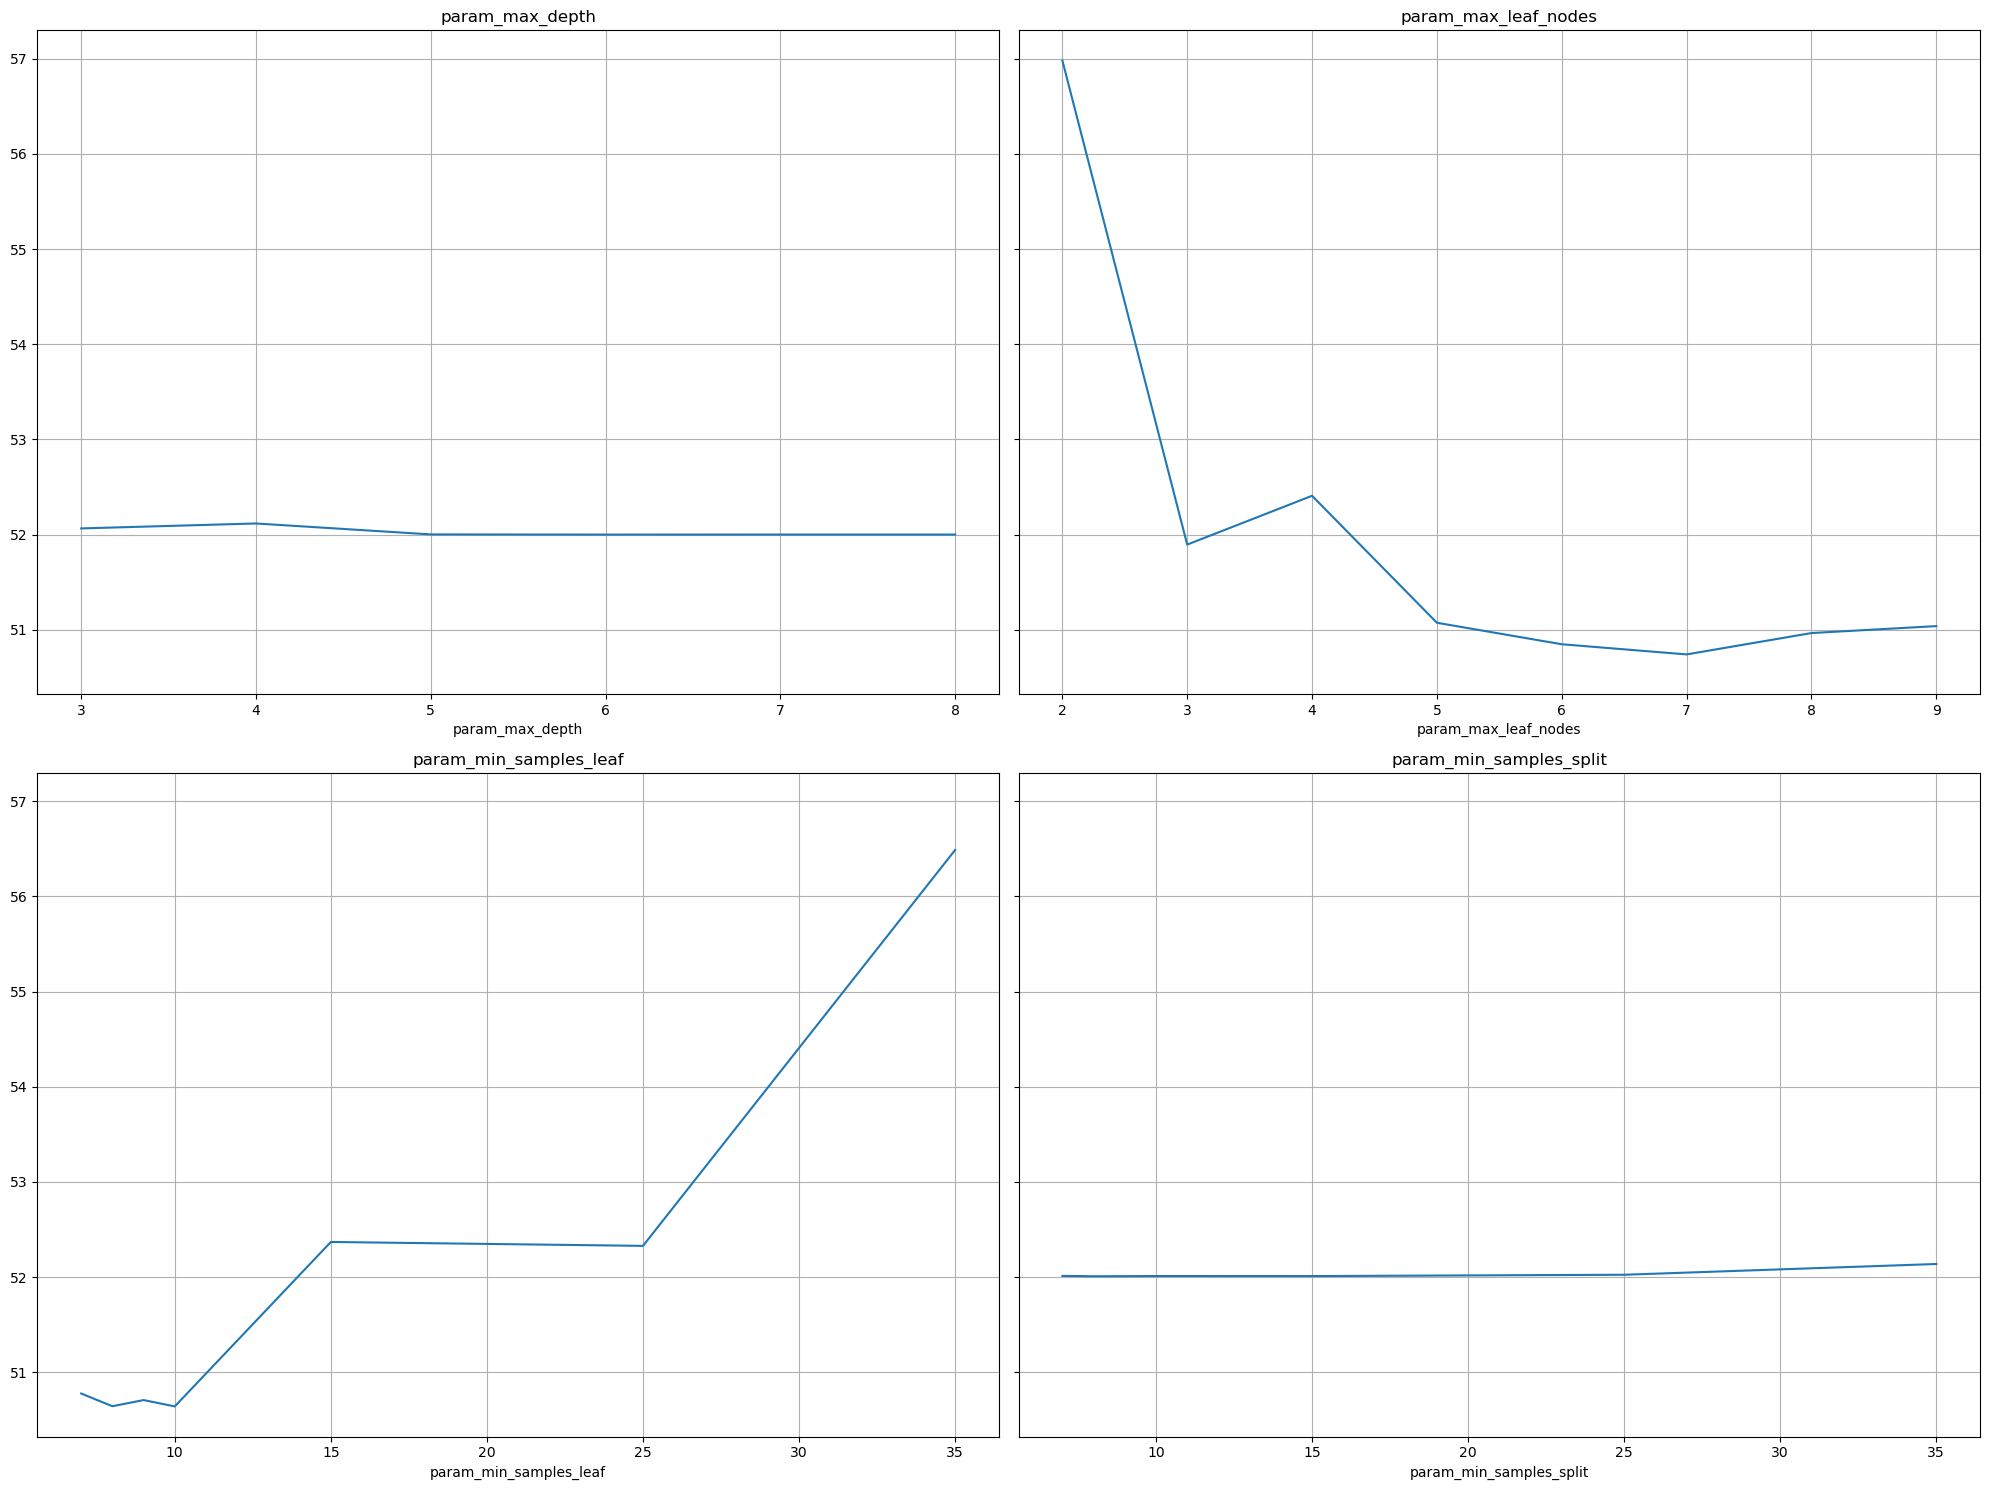

In [42]:

df_rmse_profun_prueba = np.sqrt(df_resultados_arbol_filtrado_prueba.groupby("param_max_depth")["MSE"].mean().abs())
df_rmse_profun_prueba = pd.DataFrame(df_rmse_profun_prueba).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 15), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado_prueba.columns[:-1]):
    df_rmse_col_prueba = np.sqrt(df_resultados_arbol_filtrado_prueba.groupby(column)["MSE"].mean().abs())
    sns.lineplot(x=df_rmse_col_prueba.index, y=df_rmse_col_prueba.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)
plt.tight_layout()
plt.show() 

In [43]:
pd.DataFrame(modelo_final_arbol_prueba.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by = "Importancia", ascending=False).head()

,Importancia
municipality,0.90
size_MinMax,0.08
district,0.02
bathrooms,0.00
floor_bj,0.00


De momento parece que mi primera opción de parámetros me da los mejores resultados.

In [133]:
# Parámetros a evaluar
params_arbolu = {
    'max_depth': [7, 8,10, 30, 50, 70, 100,200,300],
    'min_samples_split': [6,8,10,20,25,30,35,40, 50, 500, 2000],
    'min_samples_leaf': [1,3,6,7,8,10,20,30, 50, 500, 2000],
    'max_leaf_nodes': [8, 10,50, 60, 70,80,90,100,150, 200,2000]
}

grid_search_arbolu=GridSearchCV(DecisionTreeRegressor(), param_grid=params_arbolu, cv=5, scoring= "neg_mean_squared_error", n_jobs=-1)

grid_search_arbolu.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7, 8, 10, 30, 50, 70, 100, 200, 300],
                         'max_leaf_nodes': [8, 10, 50, 60, 70, 80, 90, 100, 150,
                                            200, 2000],
                         'min_samples_leaf': [1, 3, 6, 7, 8, 10, 20, 30, 50,
                                              500, 2000],
                         'min_samples_split': [6, 8, 10, 20, 25, 30, 35, 40, 50,
                                               500, 2000]},
             scoring='neg_mean_squared_error')

In [134]:
modelo_final_arbolu=grid_search_arbolu.best_estimator_  #para ver el mejor arbol que me ha elegido
modelo_final_arbolu

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=60, min_samples_leaf=7,
                      min_samples_split=30)

In [135]:
y_pred_test_arbu= modelo_final_arbolu.predict(x_test)
y_pred_train_arbu= modelo_final_arbolu.predict(x_train)
df_metricas_arbolu= f.metricas(y_train, y_pred_train_arbu, y_test, y_pred_test_arbu)
df_metricas_arbolu=df_metricas_arbolu.T
df_metricas_arbolu.reset_index(inplace=True)
df_metricas_arbolu

,index,r2_score,MAE,MSE,RMSE
0,train,0.76,28.95,"1,513.46",38.90
1,test,0.62,37.49,"2,342.02",48.39


### Vamos a graficarlo porque así se entienden mejor

In [136]:
df_resultados_arbol_prueba=pd.DataFrame(grid_search_arbolu.cv_results_)

In [137]:
df_resultados_arbol_prueba.sort_values(by= "rank_test_score", ascending=True).head(2)    #aquí podemos ver cual nos ha dado como mejor modelo (el 1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9113,0.01,0.00,0.01,0.00,100,200,7,30,"{'max_depth': 100, 'max_leaf_nodes': 200, 'min...","-2,279.07","-1,893.45","-1,785.35","-2,353.84","-2,988.86","-2,260.11",424.28,1
10565,0.01,0.00,0.01,0.00,200,2000,7,30,"{'max_depth': 200, 'max_leaf_nodes': 2000, 'mi...","-2,279.07","-1,893.45","-1,785.35","-2,353.84","-2,988.86","-2,260.11",424.28,1


In [138]:
df_resultados_arbol_prueba.shape   #no da el número de modelos que ha generado el árbol 

(11979, 17)

In [139]:
df_resultados_arbol_filtrado_prueba=df_resultados_arbol_prueba.filter(like= "param").drop(columns= "params")
df_resultados_arbol_filtrado_prueba["MSE"]= df_resultados_arbol_prueba["mean_test_score"]
df_resultados_arbol_filtrado_prueba.head()


,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
0,7,8,1,6,"-2,605.16"
1,7,8,1,8,"-2,601.63"
2,7,8,1,10,"-2,605.16"
3,7,8,1,20,"-2,502.24"
4,7,8,1,25,"-2,464.77"


In [140]:
df_rmse_profun_prueba= np.sqrt(df_resultados_arbol_filtrado_prueba.groupby("param_max_depth")["MSE"].mean().abs()).reset_index()
df_rmse_profun_prueba.head()

,param_max_depth,MSE
0,7,62.69
1,8,62.73
2,10,62.81
3,30,62.82
4,50,62.80


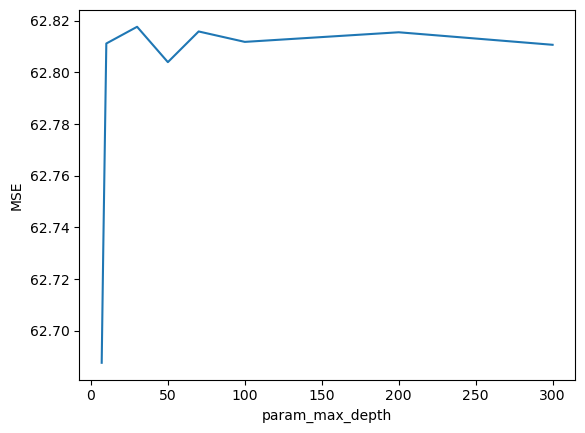

In [141]:
sns.lineplot(x= "param_max_depth", y = "MSE", data= df_rmse_profun_prueba);

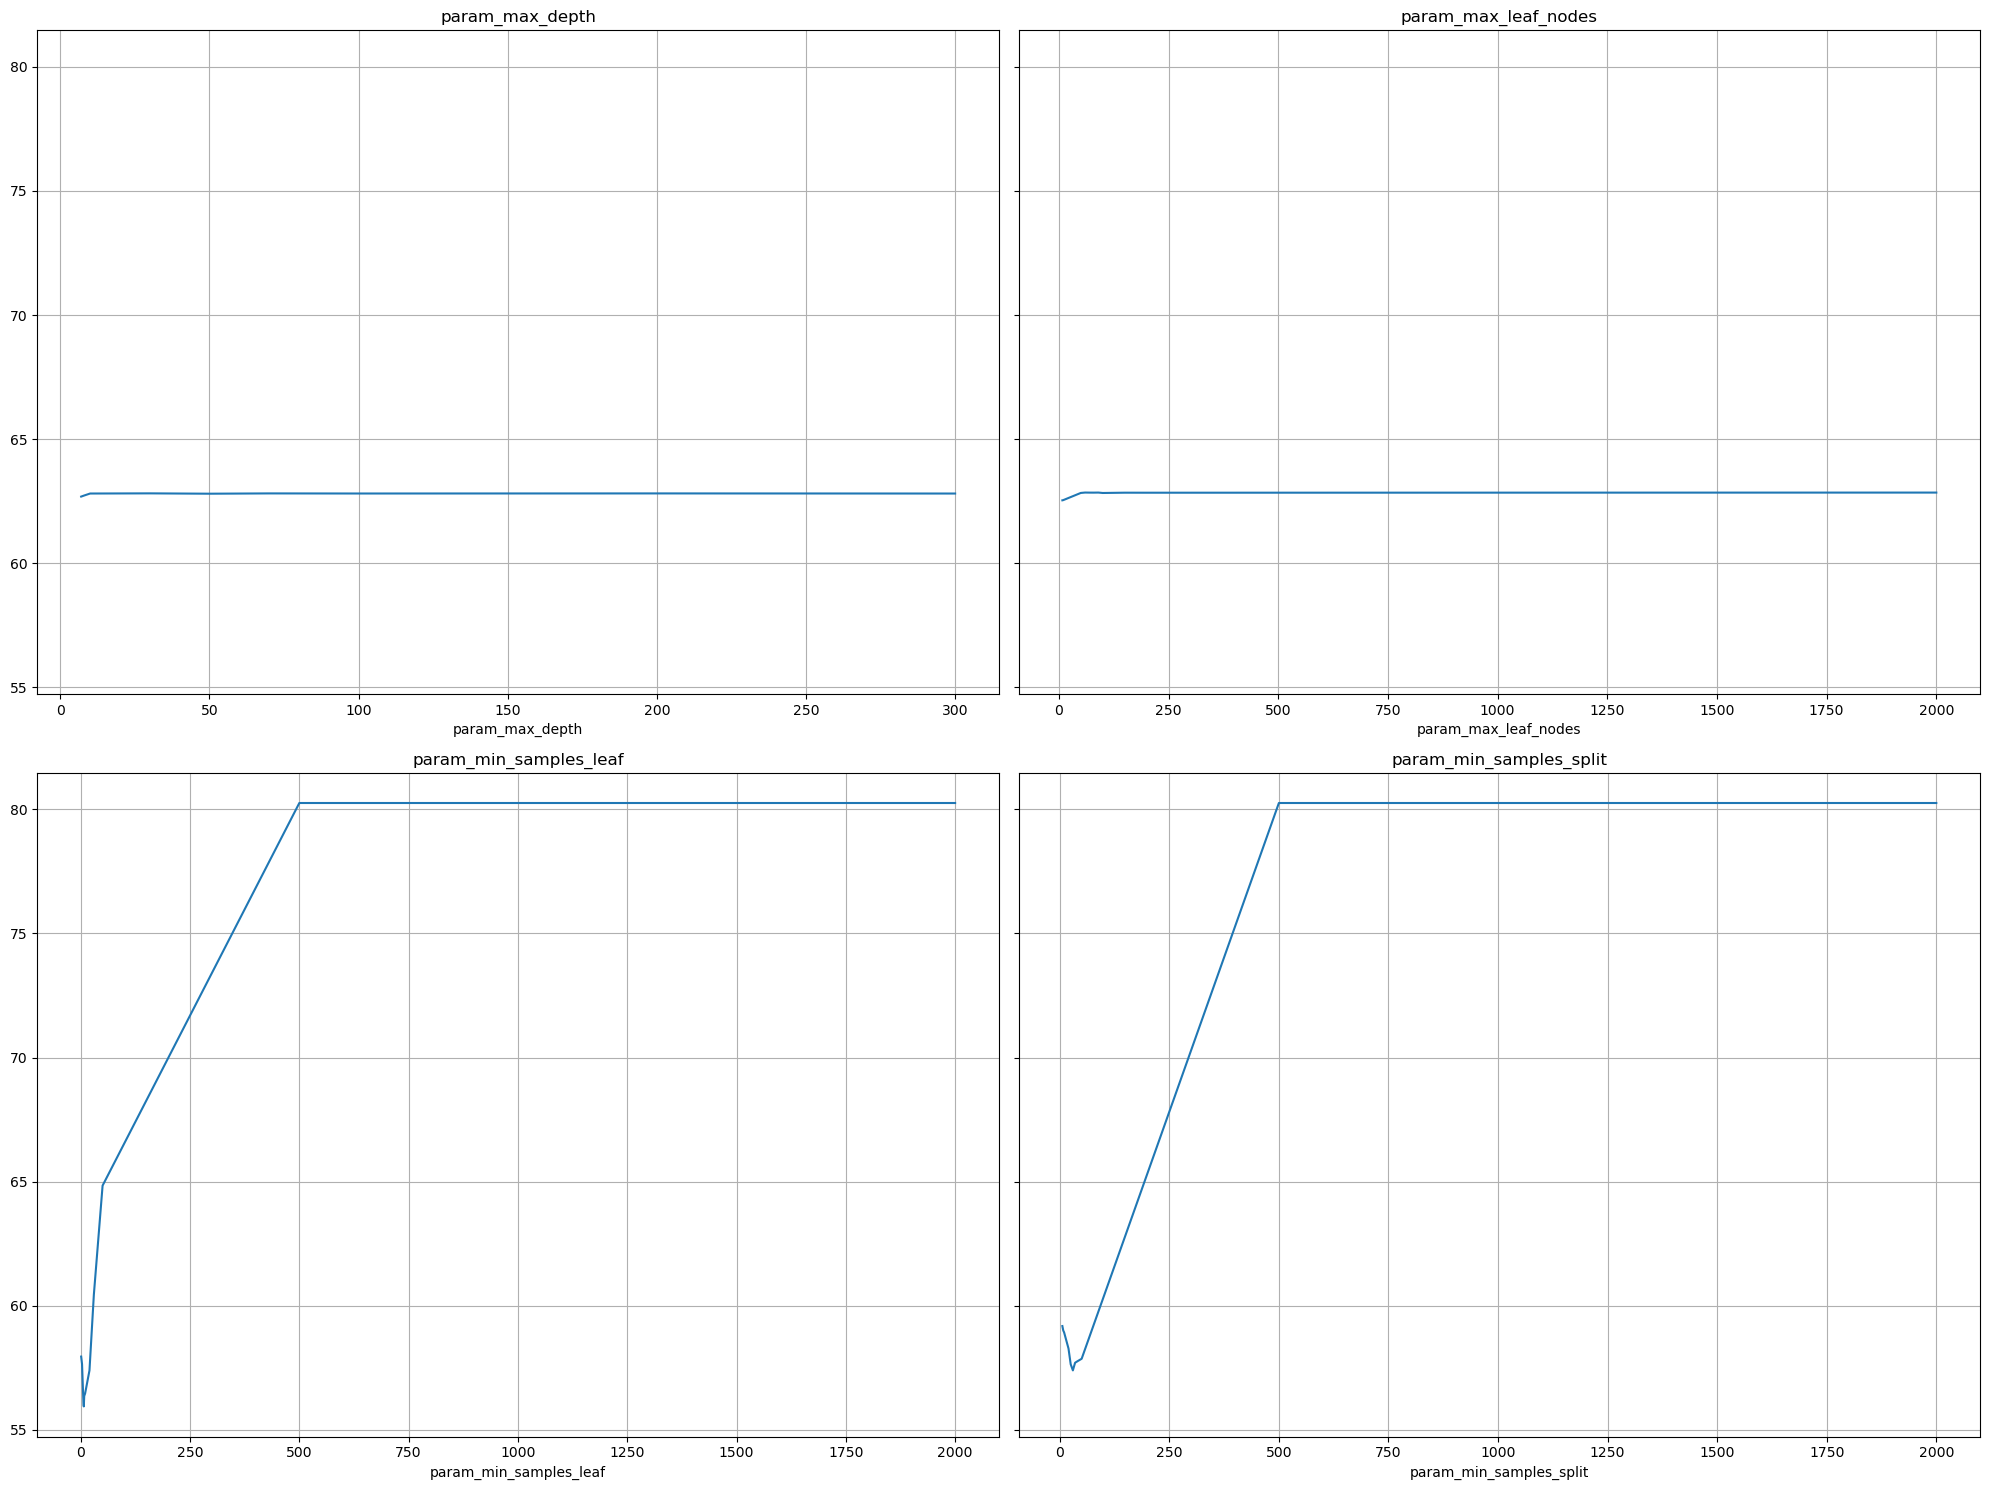

In [142]:

df_rmse_profun_prueba = np.sqrt(df_resultados_arbol_filtrado_prueba.groupby("param_max_depth")["MSE"].mean().abs())
df_rmse_profun_prueba = pd.DataFrame(df_rmse_profun_prueba).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 15), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado_prueba.columns[:-1]):
    df_rmse_col_prueba = np.sqrt(df_resultados_arbol_filtrado_prueba.groupby(column)["MSE"].mean().abs())
    sns.lineplot(x=df_rmse_col_prueba.index, y=df_rmse_col_prueba.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)
plt.tight_layout()
plt.show() 

In [143]:
pd.DataFrame(modelo_final_arbol_prueba.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by = "Importancia", ascending=False).head()

,Importancia
municipality,0.90
size_MinMax,0.08
district,0.02
bathrooms,0.00
floor_bj,0.00


**probamos una última combinación de parametros para el modelo**

In [253]:
# Parámetros a evaluar
params_ult = {
    'max_depth': [7],
    'min_samples_split': [30],
    'min_samples_leaf': [7],
    'max_leaf_nodes': [9]
}

grid_search_ult=GridSearchCV(DecisionTreeRegressor(), param_grid=params_ult, cv=5, scoring= "neg_mean_squared_error", n_jobs=-1)

grid_search_ult.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7], 'max_leaf_nodes': [9],
                         'min_samples_leaf': [7], 'min_samples_split': [30]},
             scoring='neg_mean_squared_error')

In [254]:
modelo_final_ult=grid_search_ult.best_estimator_  #para ver el mejor arbol que me ha elegido
modelo_final_ult

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=9, min_samples_leaf=7,
                      min_samples_split=30)

In [255]:
y_pred_test_ult= modelo_final_ult.predict(x_test)
y_pred_train_ult= modelo_final_ult.predict(x_train)
df_metricas_ult= f.metricas(y_train, y_pred_train_ult, y_test, y_pred_test_ult)
df_metricas_ult=df_metricas_ult.T
df_metricas_ult.reset_index(inplace=True)
df_metricas_ult

,index,r2_score,MAE,MSE,RMSE
0,train,0.74,30.60,"1,648.24",40.60
1,test,0.64,35.79,"2,251.24",47.45


In [263]:
pd.DataFrame(modelo_final_ult.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by = "Importancia", ascending=False).head()

,Importancia
municipality,0.87
size_MinMax,0.09
district,0.02
hasLift_True,0.01
bathrooms,0.00


PARA PODER COMPARAR MEJOR LOS MODELOS

In [264]:
dicc={0: "modelo1",
      1: "modelo1",
      2: "modelo2",
      3: "modelo2",
      4: "modelo3",
      5: "modelo3",
      6: "modelo4",
      7: "modelo4"}

In [265]:
df_final=pd.DataFrame()
df_final=pd.concat([df_final,df_metricas_arbolu, df_metricas_arbol_prueba,df_metricas_arbol,df_metricas_ult], axis=0, ignore_index=True)
df_final.reset_index(inplace=True)
df_final["level_0"]=df_final["level_0"].map(dicc)
df_final['diff_r2_score'] = df_final.groupby('level_0')['r2_score'].transform(lambda x: x.iloc[0] - x.iloc[1])
df_final['diff_RMSE'] = df_final.groupby('level_0')['RMSE'].transform(lambda x: x.iloc[0] - x.iloc[1])

df_final

,level_0,index,r2_score,MAE,MSE,RMSE,diff_r2_score,diff_RMSE
0,modelo1,train,0.76,28.95,"1,513.46",38.90,0.14,-9.49
1,modelo1,test,0.62,37.49,"2,342.02",48.39,0.14,-9.49
2,modelo2,train,0.72,31.25,"1,782.81",42.22,0.10,-6.06
3,modelo2,test,0.62,35.81,"2,331.72",48.29,0.10,-6.06
4,modelo3,train,0.70,32.46,"1,884.16",43.41,0.08,-4.71
5,modelo3,test,0.63,35.05,"2,315.25",48.12,0.08,-4.71
6,modelo4,train,0.74,30.60,"1,648.24",40.60,0.10,-6.85
7,modelo4,test,0.64,35.79,"2,251.24",47.45,0.10,-6.85


## Elección de mejor modelo:  
Comparando los modelos nos damos cuenta que el modelo mejor equilibrado es el modelo 3 (tiene metricas bastante buenas y el menor over fitting). Sin embargo, elijo quedarme con el modelo 4 que cuenta con un muy buen equilibrio también (el segundo con menos over fitting) y tiene una levemente mayor capacidad explicativa.  
  
**Finalmente me quedo con el modelo 4 correspondiente al último modelo**

In [266]:
df_metricas_ult.drop(columns= "index", inplace=True)

In [267]:
df_metricas_ulti=df_metricas_ult.T
df_metricas_ulti.columns= ["train", "test"]
df_metricas_ulti.reset_index(inplace=True)
df_metricas_ulti

,index,train,test
0,r2_score,0.74,0.64
1,MAE,30.60,35.79
2,MSE,"1,648.24","2,251.24"
3,RMSE,40.60,47.45


In [269]:
df_metricas_ulti

,index,train,test
0,r2_score,0.74,0.64
1,MAE,30.60,35.79
2,MSE,"1,648.24","2,251.24"
3,RMSE,40.60,47.45


Vamos a intentar visualizar las cositas

In [278]:
predytest=pd.DataFrame(y_pred_test_ult, columns=["y_pred_test_ult"])

In [279]:
predytrain=pd.DataFrame(y_pred_train_ult, columns=["y_pred_train_ult"])

In [280]:
df_fin=pd.DataFrame()
df_fin=pd.concat([df_fin, predytest, predytrain, y], ignore_index=True, axis=1)

In [281]:
df_fin.columns= ["test_prediccion", "train_prediccion", "precio_original"]

In [282]:
df_fin.reset_index(inplace=True)

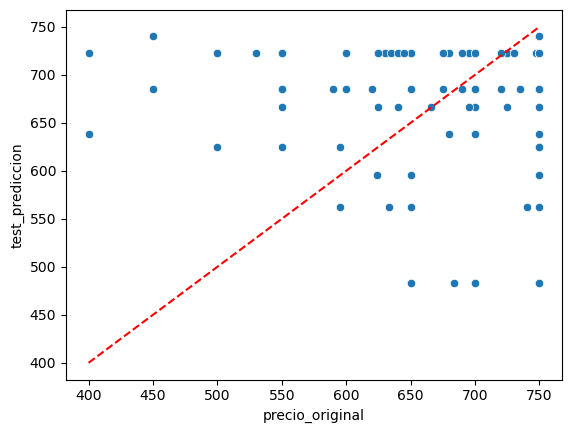

In [283]:
sns.scatterplot(x="precio_original", y="test_prediccion", data= df_fin)
plt.plot([df_fin["precio_original"].min(), df_fin["precio_original"].max()],
         [df_fin["precio_original"].min(), df_fin["precio_original"].max()],
         color='red', linestyle='--', label='x = y')

***CONCLUSIONES DE ESTE MODELO 4 PARA INTENTAR MEJORAR***  
  
- Este modelo 4 me predice mal los precios 400-550 aproximadamente (me predice las viviendas baratas como caras)  y un poco los precios de 650-750 (algunas viviendas caras me las predice como baratas)  
